In [1]:
!pip install --upgrade PyWavelets
!pip install --upgrade opencv-python
!pip install --upgrade seaborn.
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

ERROR: Invalid requirement: 'seaborn.'


In [2]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

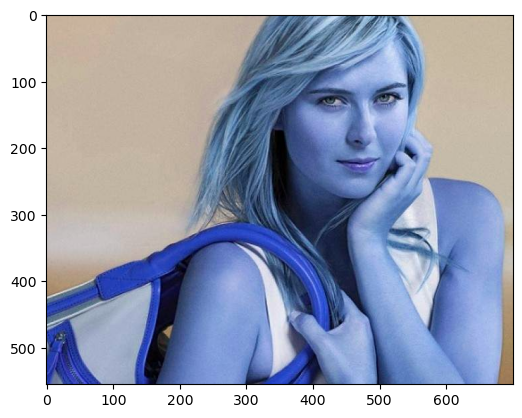

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[183, 183, 183, ..., 183, 182, 181],
       [183, 183, 183, ..., 184, 182, 181],
       [183, 183, 183, ..., 184, 183, 181],
       ...,
       [ 60,  62,  63, ..., 126, 126, 126],
       [ 64,  64,  65, ..., 126, 126, 126],
       [ 69,  66,  66, ..., 125, 125, 125]], dtype=uint8)

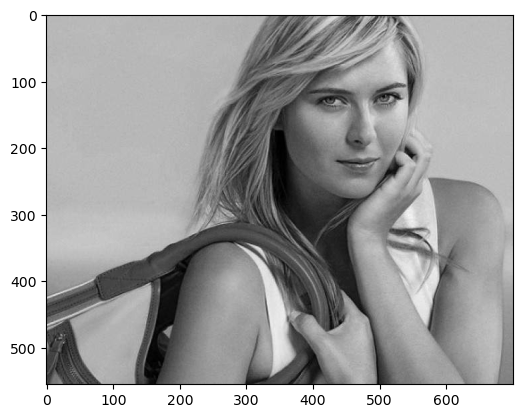

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[356,  37, 233, 233]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(356, 37, 233, 233)

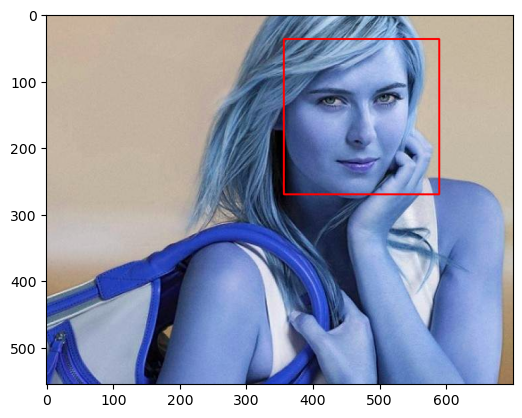

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

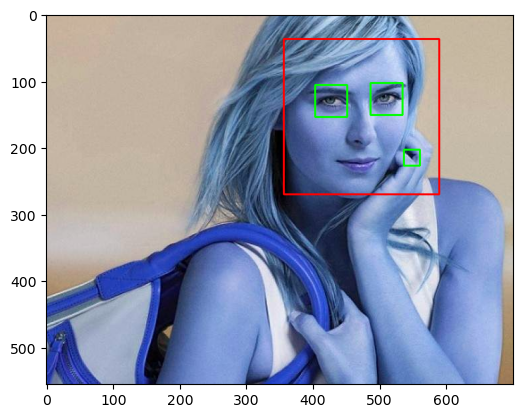

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

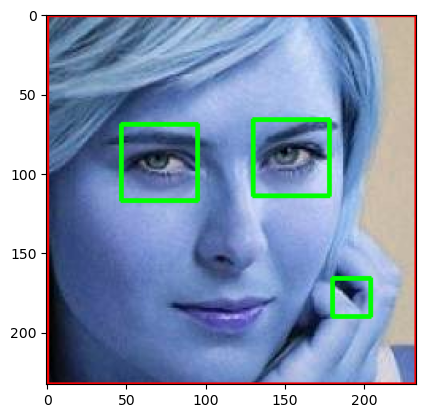

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

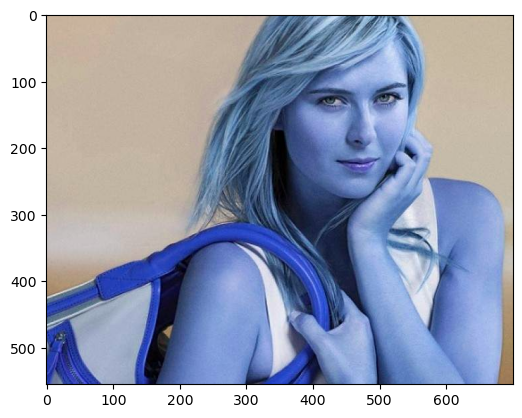

In [13]:
original_image=cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

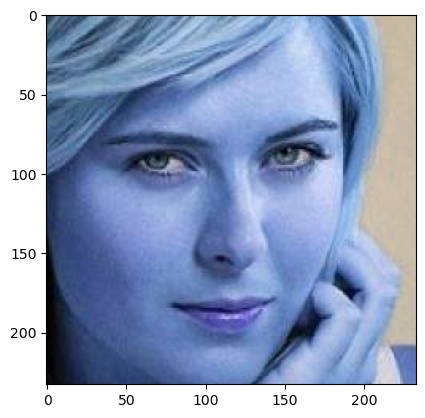

In [14]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

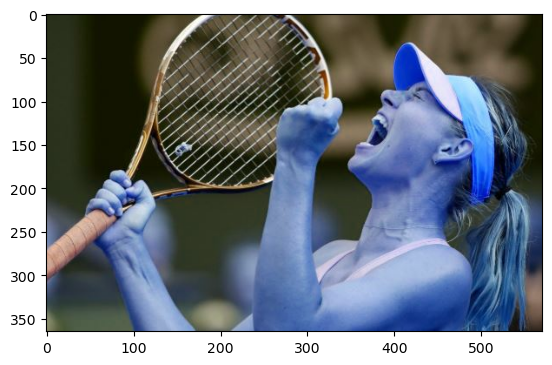

In [15]:
org_image_obstructed=cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = "./dataset"
path_to_cr_data="./dataset/cropped"

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset\\cropped',
 './dataset\\lionel_messi',
 './dataset\\maria_sharapova',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped\lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped\maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped\roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped\serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped\virat_kohli


In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs= pywt.wavedec2(imArray, mode, level=level)
    
    #Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

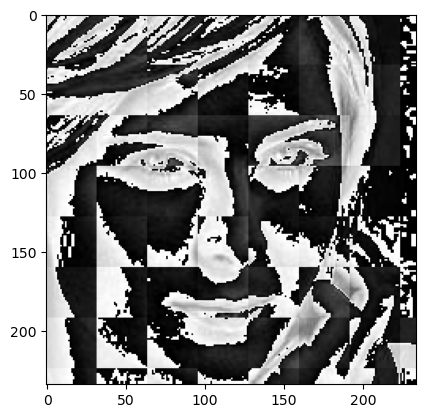

In [23]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [50]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict    


{'lionel_messi': ['./dataset/cropped\\lionel_messi\\lionel_messi1.png',
  './dataset/cropped\\lionel_messi\\lionel_messi10.png',
  './dataset/cropped\\lionel_messi\\lionel_messi11.png',
  './dataset/cropped\\lionel_messi\\lionel_messi13.png',
  './dataset/cropped\\lionel_messi\\lionel_messi14.png',
  './dataset/cropped\\lionel_messi\\lionel_messi15.png',
  './dataset/cropped\\lionel_messi\\lionel_messi16.png',
  './dataset/cropped\\lionel_messi\\lionel_messi17.png',
  './dataset/cropped\\lionel_messi\\lionel_messi18.png',
  './dataset/cropped\\lionel_messi\\lionel_messi19.png',
  './dataset/cropped\\lionel_messi\\lionel_messi2.png',
  './dataset/cropped\\lionel_messi\\lionel_messi20.png',
  './dataset/cropped\\lionel_messi\\lionel_messi21.png',
  './dataset/cropped\\lionel_messi\\lionel_messi23.png',
  './dataset/cropped\\lionel_messi\\lionel_messi24.png',
  './dataset/cropped\\lionel_messi\\lionel_messi25.png',
  './dataset/cropped\\lionel_messi\\lionel_messi26.png',
  './dataset/crop

In [51]:
class_dict ={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [52]:
X,Y = [],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [53]:
len(X[0])

4096

In [54]:
X[0]

array([[ 72],
       [100],
       [114],
       ...,
       [123],
       [224],
       [226]], dtype=uint8)

In [55]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

In [56]:
X[0]

array([ 72., 100., 114., ..., 123., 224., 226.])

In [57]:
cropped_image_dirs

['./dataset/cropped\\lionel_messi',
 './dataset/cropped\\maria_sharapova',
 './dataset/cropped\\roger_federer',
 './dataset/cropped\\serena_williams',
 './dataset/cropped\\virat_kohli']

In [32]:
##  Data cleaning process is done. now we are ready to train our model
##  we will use SVM with rbf kernel tuned with heuristic finetuning


In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf', C= 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.8095238095238095

In [60]:
len(X_test)

42

In [61]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.91      0.91      0.91        11
           2       1.00      0.67      0.80         6
           3       0.67      1.00      0.80         4
           4       1.00      0.62      0.76        13

    accuracy                           0.81        42
   macro avg       0.84      0.84      0.81        42
weighted avg       0.87      0.81      0.81        42



In [62]:
#use gridSearch

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [64]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params']) 
df

,model,best_score,best_params
0,svm,0.821,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.690,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.845,{'logisticregression__C': 1}


In [65]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [66]:
best_estimators['svm'].score(X_test,Y_test)

0.8809523809523809

In [67]:
best_estimators['random_forest'].score(X_test,Y_test)

0.7380952380952381

In [68]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.8333333333333334

In [70]:
best_clf = best_estimators['svm']

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0],
       [ 1,  0,  5,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 2,  1,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

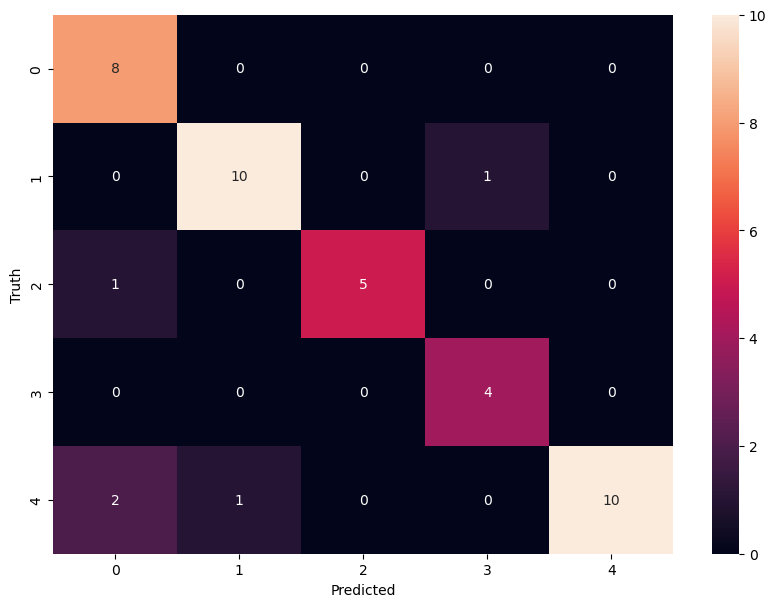

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [74]:
# Save the trained model
!pip install joblib
import joblib
#Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [75]:
#Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))